## Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from wordcloud import WordCloud
import pickle

#### Load dữ liệu đã tiền xử lý

In [2]:
train_x = pickle.load(open('Data/saved/train_x.sav', 'rb'))
train_y = pickle.load(open('Data/saved/train_y.sav', 'rb'))
test_x = pickle.load(open('Data/saved/test_x.sav', 'rb'))
test_y = pickle.load(open('Data/saved/test_y.sav', 'rb'))

#### Dữ liệu chưa xử lý
![dataset_before_preprocess](image/dataset_before_preprocess.png)

#### Dữ liệu đã qua xử lý

In [5]:
# Tính độ dài trung bình của tập dữ liệu
def sentence_len(text):
    return len(text.split(" "))

new_data_sizes = []

for content in train_x:
    new_data_sizes.append(sentence_len(content))

print('Độ dài trung bình:', np.mean(new_data_sizes))

Độ dài trung bình: 263.63227826086955


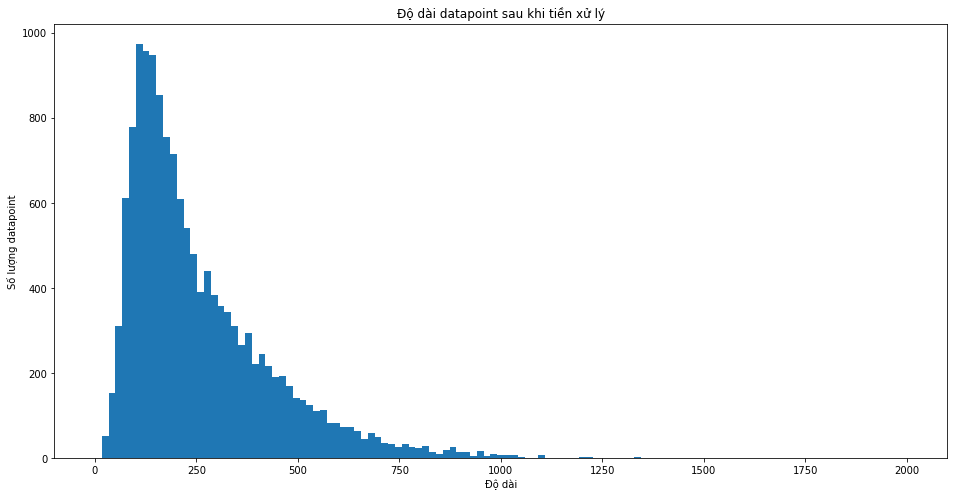

In [6]:
# vẽ histogram cho dataset
plt.figure(figsize=(16, 8))
plt.title("Độ dài datapoint sau khi tiền xử lý")
plt.xlabel('Độ dài')
plt.ylabel('Số lượng datapoint')
plt.hist(np.array(new_data_sizes), bins=int(math.sqrt(len(new_data_sizes))), range=(0, 2000))
plt.savefig('image/dataset_after_preprocess.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Như vậy, phần lớn datapoint bây giờ chỉ có độ dài không quá 1000 từ và độ dài trung bình cho mỗi mẫu cũng đã giảm xuống khoảng 1 nửa.

# Phân tích dữ liệu

### Phân bố của các nhãn trên tập dữ liệu

In [7]:
labels = os.listdir('Data/train')
print('Số lượng nhãn:', len(labels))
labels

Số lượng nhãn: 27


['Am nhac',
 'Am thuc',
 'Bat dong san',
 'Bong da',
 'Chung khoan',
 'Cum ga',
 'Cuoc song do day',
 'Du hoc',
 'Du lich',
 'Duong vao WTO',
 'Gia dinh',
 'Giai tri tin hoc',
 'Giao duc',
 'Gioi tinh',
 'Hackers va Virus',
 'Hinh su',
 'Khong gian song',
 'Kinh doanh quoc te',
 'Lam dep',
 'Loi song',
 'Mua sam',
 'My thuat',
 'San khau dien anh',
 'San pham tin hoc moi',
 'Tennis',
 'The gioi tre',
 'Thoi trang']

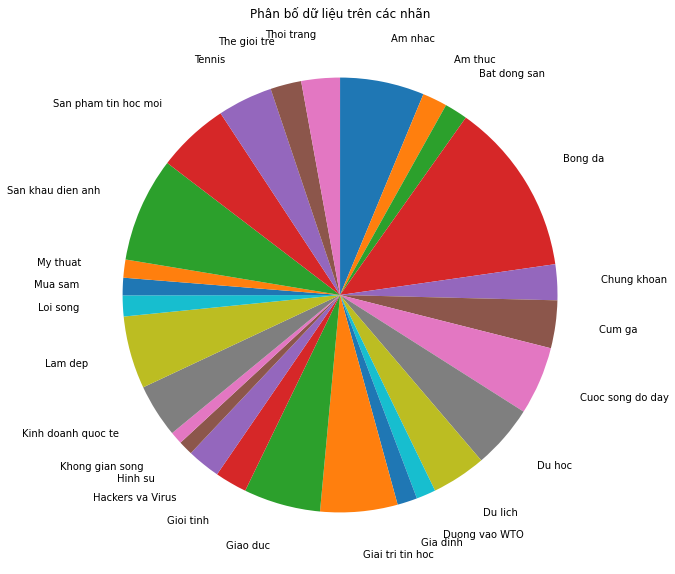

In [13]:
# kích thước của mỗi nhãn
sizes = []
np_train_y = np.array(train_y)
for label in labels:
    sizes.append(np_train_y[np.where(np_train_y == label)].shape[0])
    
S = sum(sizes)
sizes = [s/S for s in sizes]
plt.figure(figsize=(10, 10))
plt.title('Phân bố dữ liệu trên các nhãn')
plt.pie(sizes, labels=labels, startangle=90, counterclock=False, labeldistance=1.2)
plt.savefig('image/label_distribution.png', facecolor='whitesmoke', bbox_inches='tight')
plt.show()

**Nhận xét:** Có nhiều nhãn có kích thước rất bé như *Am thuc* , *Bat dong san*, trong khi có nhiều nhãn có kích thước lớn như *Bong da*, *San khau dien anh*, ... Điều này đòi hỏi phải chia tập train và valid cho phù hợp.

### Độ phổ biến của các từ trong một nhãn

Ví dụ với nhãn Am nhac, ta có thể đánh giá được sơ bộ phân phối của các từ trong một nhãn.

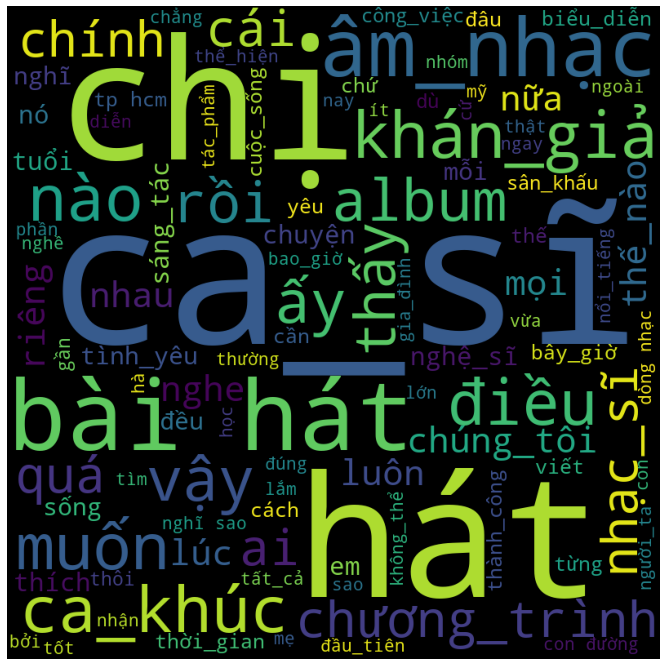

In [16]:
# Vẽ biểu đồ Word cloud cho label Am nhac
np_train_x = np.array(train_x)
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 'Am nhac')]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('image/word_distribution_Am_nhac.png',facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Ví dụ với nhãn Bong da

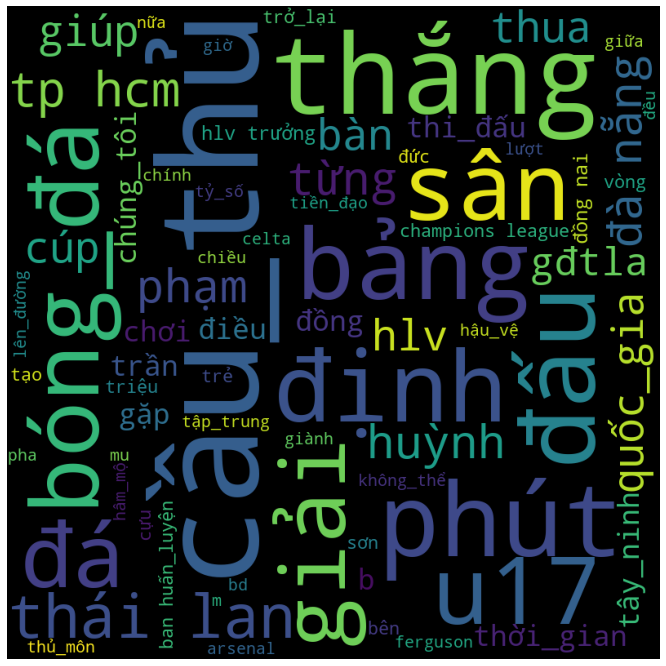

In [17]:
# Vẽ biểu đồ Word cloud cho label Bong da
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 'Bong da')]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('image/word_distribution_Bong_da.png',facecolor='whitesmoke', bbox_inches='tight')
plt.show()

Ví dụ nhãn Lam dep

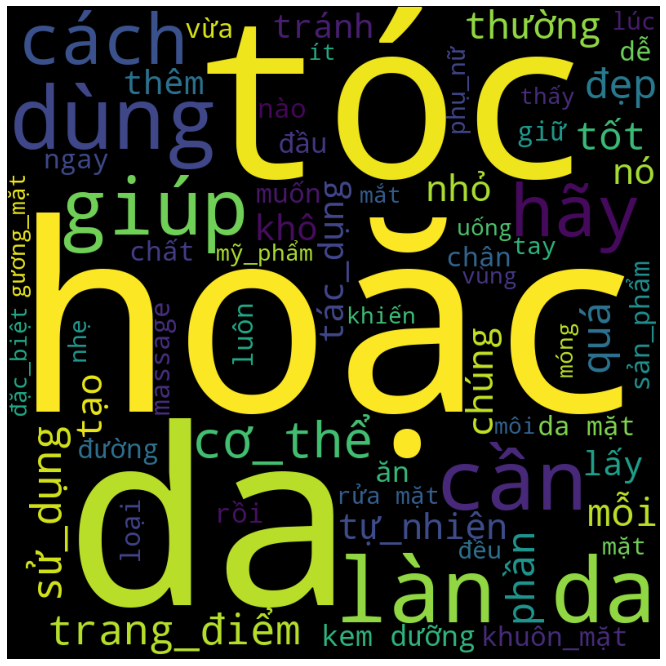

In [18]:
# Vẽ biểu đồ Word cloud cho label Lam dep
wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 'Lam dep')]))

fig = plt.figure(figsize=(12, 12), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('image/word_distribution_Lam_dep.png',facecolor='whitesmoke', bbox_inches='tight')
plt.show()

**Nhận xét:** Ta nhận thấy rằng những tin tức thuộc nhãn Am nhac có tần suất xuất hiện nhiều các từ như ca_sĩ, bài_hát, ca_khúc ...

Nhãn Bong da có những từ xuất hiện nhiều như cầu_thủ, thắng, bóng_đá, ...

Nhãn Lam dep có những từ xuất hiện nhiều như tóc, da, cơ_thể, ...

Đó là những từ liên quan trực tiếp tới những lĩnh vực này. Vì vậy, ta hoàn toàn có thể sử dụng tần số xuất hiện của mỗi từ để phân loại xem văn bản đó thuộc nhãn nào.